In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleaned data/價格_全國芭樂交易資料(初步清洗).csv", usecols=[0, 1, 2, 3, 4, 5, 6, 7])
df.head()

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
1,2011-01-01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2,2011-01-01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
3,2011-01-01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
4,2011-01-01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518


In [3]:
df["日期"] = pd.to_datetime(df["日期"])

In [4]:
df["市場"].unique()

array(['104 台北二', '400 台中市', '600 嘉義市', '109 台北一', '800 高雄市', '930 台東市',
       '241 三重區', '830 鳳山區', '338 桃農', '260 宜蘭市', '423 東勢區', '420 豐原區',
       '220 板橋區'], dtype=object)

### **三重區市場各年度價格＆交易量**

In [5]:
df_sanchong = df.loc[df["市場"] == '241 三重區']
df_sanchong.head()

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
6,2011-01-01,241 三重區,P1 番石榴 珍珠芭,54.9,34.9,30.2,37.9,34495
7,2011-01-02,241 三重區,P1 番石榴 珍珠芭,56.8,35.9,30.3,38.9,24739
20,2011-01-04,241 三重區,P1 番石榴 珍珠芭,61.5,35.4,28.1,39.1,24677
29,2011-01-05,241 三重區,P1 番石榴 珍珠芭,61.7,35.9,28.6,39.6,23480
31,2011-01-06,241 三重區,P1 番石榴 珍珠芭,61.5,37.2,28.8,40.4,23758


In [6]:
df_sanchong.set_index("日期", inplace=True)
df_sanchong.head()

,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,,,
2011-01-01,241 三重區,P1 番石榴 珍珠芭,54.9,34.9,30.2,37.9,34495
2011-01-02,241 三重區,P1 番石榴 珍珠芭,56.8,35.9,30.3,38.9,24739
2011-01-04,241 三重區,P1 番石榴 珍珠芭,61.5,35.4,28.1,39.1,24677
2011-01-05,241 三重區,P1 番石榴 珍珠芭,61.7,35.9,28.6,39.6,23480
2011-01-06,241 三重區,P1 番石榴 珍珠芭,61.5,37.2,28.8,40.4,23758


In [7]:
df_sanchong_month = df_sanchong.resample("M").mean().round(1)
df_sanchong_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,
2011-01-31,49.7,28.9,22.8,31.8,28885.3
2011-02-28,31.1,16.6,12.3,18.6,42862.0
2011-03-31,47.8,26.2,21.6,29.6,38193.0
2011-04-30,26.2,17.4,13.6,18.4,58693.7
2011-05-31,34.1,24.4,15.7,24.6,39316.6
...,...,...,...,...,...
2021-03-31,36.7,23.2,20.3,25.3,52954.6
2021-04-30,33.9,20.8,17.9,22.8,49451.4
2021-05-31,70.8,42.4,36.0,46.8,25983.1


In [8]:
df_sanchong_month["Year"] = list(df_sanchong_month.reset_index()["日期"].dt.year)
df_sanchong_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,49.7,28.9,22.8,31.8,28885.3,2011
2011-02-28,31.1,16.6,12.3,18.6,42862.0,2011
2011-03-31,47.8,26.2,21.6,29.6,38193.0,2011
2011-04-30,26.2,17.4,13.6,18.4,58693.7,2011
2011-05-31,34.1,24.4,15.7,24.6,39316.6,2011
...,...,...,...,...,...,...
2021-03-31,36.7,23.2,20.3,25.3,52954.6,2021
2021-04-30,33.9,20.8,17.9,22.8,49451.4,2021
2021-05-31,70.8,42.4,36.0,46.8,25983.1,2021


In [9]:
x = np.arange(1, 13)
y = df_sanchong_month.loc[df_sanchong_month["Year"] == 2011] # test

In [10]:
y

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,49.7,28.9,22.8,31.8,28885.3,2011
2011-02-28,31.1,16.6,12.3,18.6,42862.0,2011
2011-03-31,47.8,26.2,21.6,29.6,38193.0,2011
2011-04-30,26.2,17.4,13.6,18.4,58693.7,2011
2011-05-31,34.1,24.4,15.7,24.6,39316.6,2011
2011-06-30,46.7,33.1,23.2,33.8,26379.7,2011
2011-07-31,23.7,16.7,11.2,17.0,45118.7,2011
2011-08-31,18.6,10.8,7.3,11.6,68449.0,2011
2011-09-30,23.8,13.7,10.2,15.0,67111.2,2011


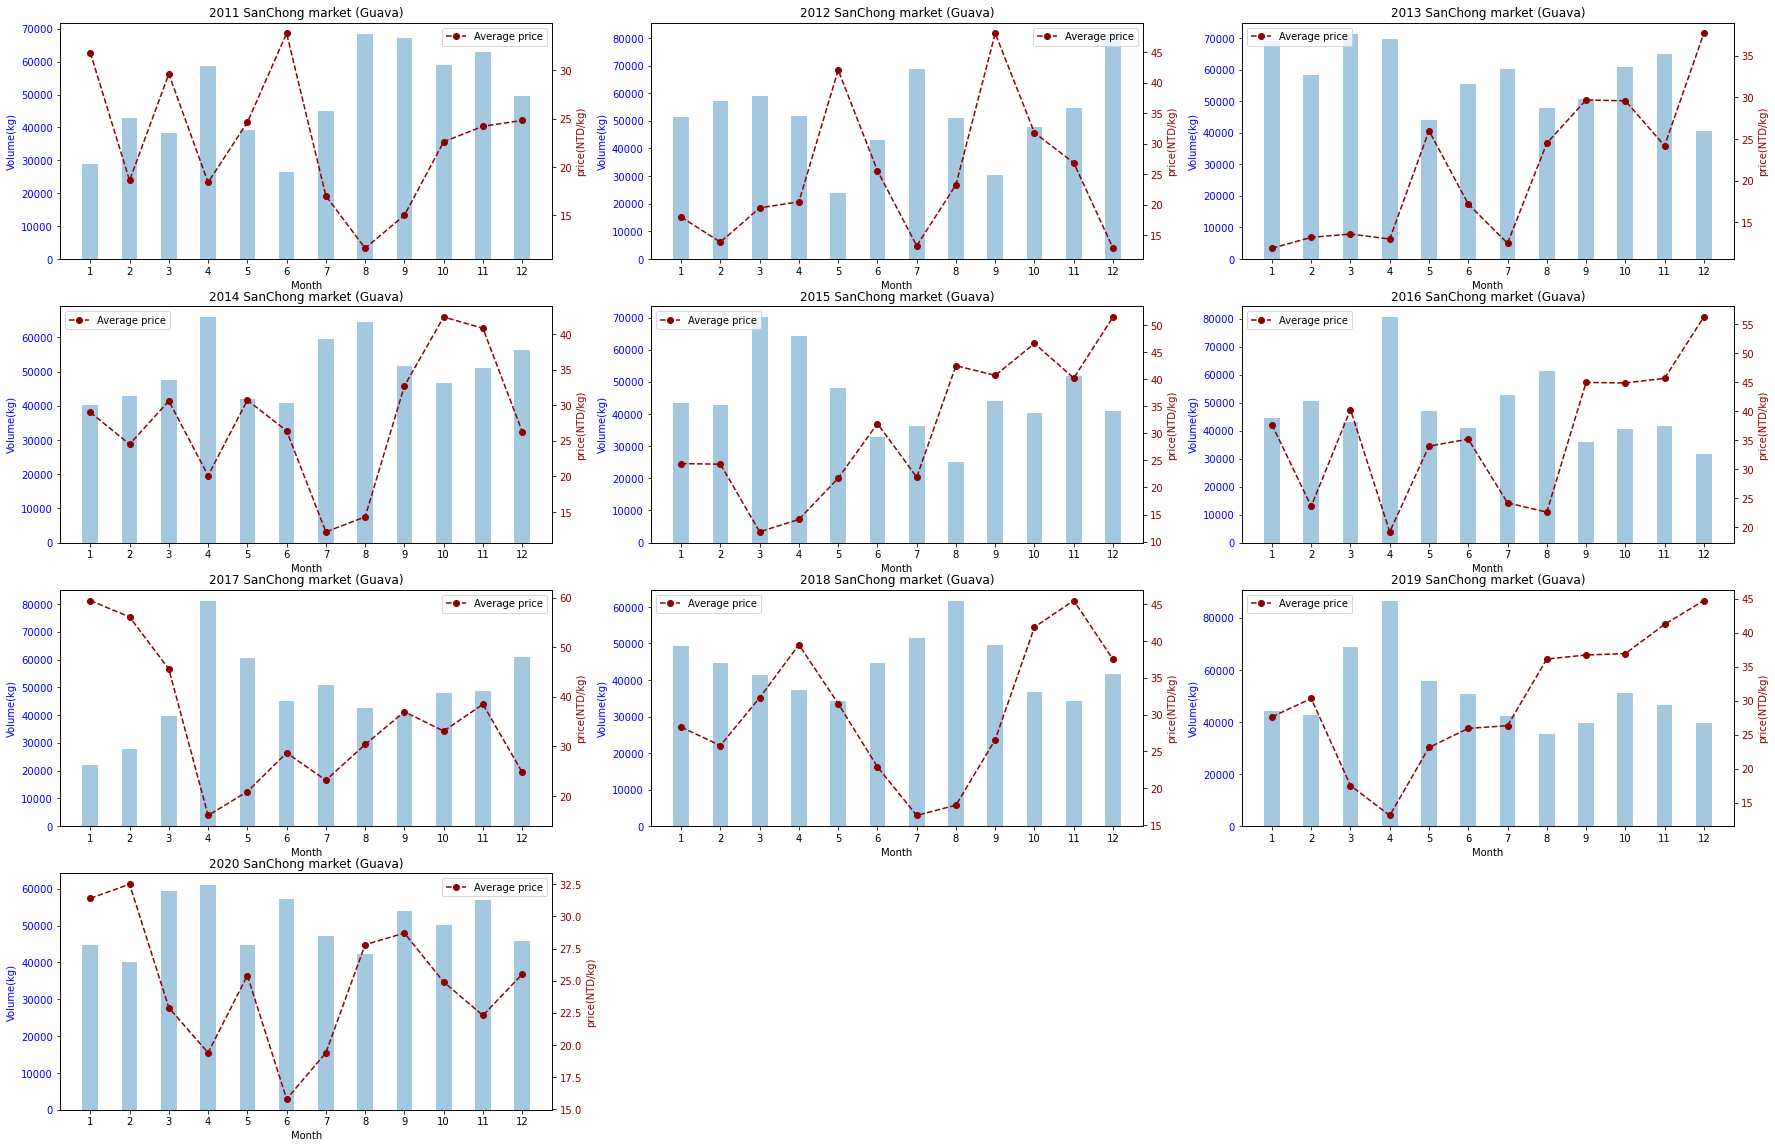

In [12]:
x = np.arange(1, 13)
num = 1

fig_test = plt.figure(figsize=(30,20))
    
for year in range(2011, 2021):
    
    y = df_sanchong_month.loc[df_sanchong_month["Year"] == year]
    #fig,ax1 = plt.subplots(figsize=(4,3))
    
    ax1 = fig_test.add_subplot(4,3,num)
    
    width = 0.2
    ax1.set_xticks(x)
    ax1.bar(x, y["交易量(公斤)"], width=0.4, alpha=0.4)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Volume(kg)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(x, y["平均價(元/公斤)"], "--", marker="o", color="darkred",label="Average price")
    ax2.set_ylabel("price(NTD/kg)", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

    #fig.tight_layout()
    plt.title(f"{year} SanChong market (Guava)")
    plt.legend()
    
    num+=1
plt.savefig("sanchong.jpg")

## 全國市場個年度價格＆交易量

In [13]:
df_test = pd.read_csv("cleaned data/價格_全國芭樂交易資料(初步清洗).csv", usecols=[0, 1, 2, 3, 4, 5, 6, 7])
df_test

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
1,2011-01-01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2,2011-01-01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
3,2011-01-01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
4,2011-01-01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518
...,...,...,...,...,...,...,...,...
31396,2021-07-08,830 鳳山區,P1 番石榴 珍珠芭,32.0,28.0,25.0,28.0,2710
31397,2021-07-08,260 宜蘭市,P1 番石榴 珍珠芭,55.0,35.0,20.0,35.0,2050
31398,2021-07-08,241 三重區,P1 番石榴 珍珠芭,43.7,25.3,20.7,28.1,33006
31399,2021-07-08,400 台中市,P1 番石榴 珍珠芭,37.5,27.9,13.0,28.0,35486


In [14]:
df_test["日期"] = pd.to_datetime(df_test["日期"])
df_test

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
1,2011-01-01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2,2011-01-01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
3,2011-01-01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
4,2011-01-01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518
...,...,...,...,...,...,...,...,...
31396,2021-07-08,830 鳳山區,P1 番石榴 珍珠芭,32.0,28.0,25.0,28.0,2710
31397,2021-07-08,260 宜蘭市,P1 番石榴 珍珠芭,55.0,35.0,20.0,35.0,2050
31398,2021-07-08,241 三重區,P1 番石榴 珍珠芭,43.7,25.3,20.7,28.1,33006
31399,2021-07-08,400 台中市,P1 番石榴 珍珠芭,37.5,27.9,13.0,28.0,35486


In [15]:
df_test.set_index("日期", inplace=True)
df_test

,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,,,
2011-01-01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
2011-01-01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2011-01-01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
2011-01-01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
2011-01-01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518
...,...,...,...,...,...,...,...
2021-07-08,830 鳳山區,P1 番石榴 珍珠芭,32.0,28.0,25.0,28.0,2710
2021-07-08,260 宜蘭市,P1 番石榴 珍珠芭,55.0,35.0,20.0,35.0,2050
2021-07-08,241 三重區,P1 番石榴 珍珠芭,43.7,25.3,20.7,28.1,33006


In [16]:
output = df_test.resample("M").mean().round(1)

In [17]:
# 參考
output["Year"] = list(output.reset_index()["日期"].dt.year)
output

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,48.9,30.8,18.4,32.7,13350.4,2011
2011-02-28,30.7,19.9,13.0,20.8,19861.2,2011
2011-03-31,41.2,29.4,20.5,30.3,16470.2,2011
2011-04-30,26.6,18.6,12.4,19.2,26789.0,2011
2011-05-31,29.6,22.1,14.3,22.2,19295.9,2011
...,...,...,...,...,...,...
2021-03-31,37.0,25.0,16.5,25.7,16409.3,2021
2021-04-30,27.8,19.5,12.7,19.9,16157.3,2021
2021-05-31,59.7,42.9,28.2,43.4,9363.1,2021


In [18]:
output[output["Year"] == 2011]

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,48.9,30.8,18.4,32.7,13350.4,2011
2011-02-28,30.7,19.9,13.0,20.8,19861.2,2011
2011-03-31,41.2,29.4,20.5,30.3,16470.2,2011
2011-04-30,26.6,18.6,12.4,19.2,26789.0,2011
2011-05-31,29.6,22.1,14.3,22.2,19295.9,2011
2011-06-30,42.6,31.5,21.3,31.9,12865.1,2011
2011-07-31,22.7,16.1,10.1,16.4,21389.7,2011
2011-08-31,19.8,12.5,7.4,12.9,27482.7,2011
2011-09-30,24.0,15.8,10.0,16.4,27253.8,2011


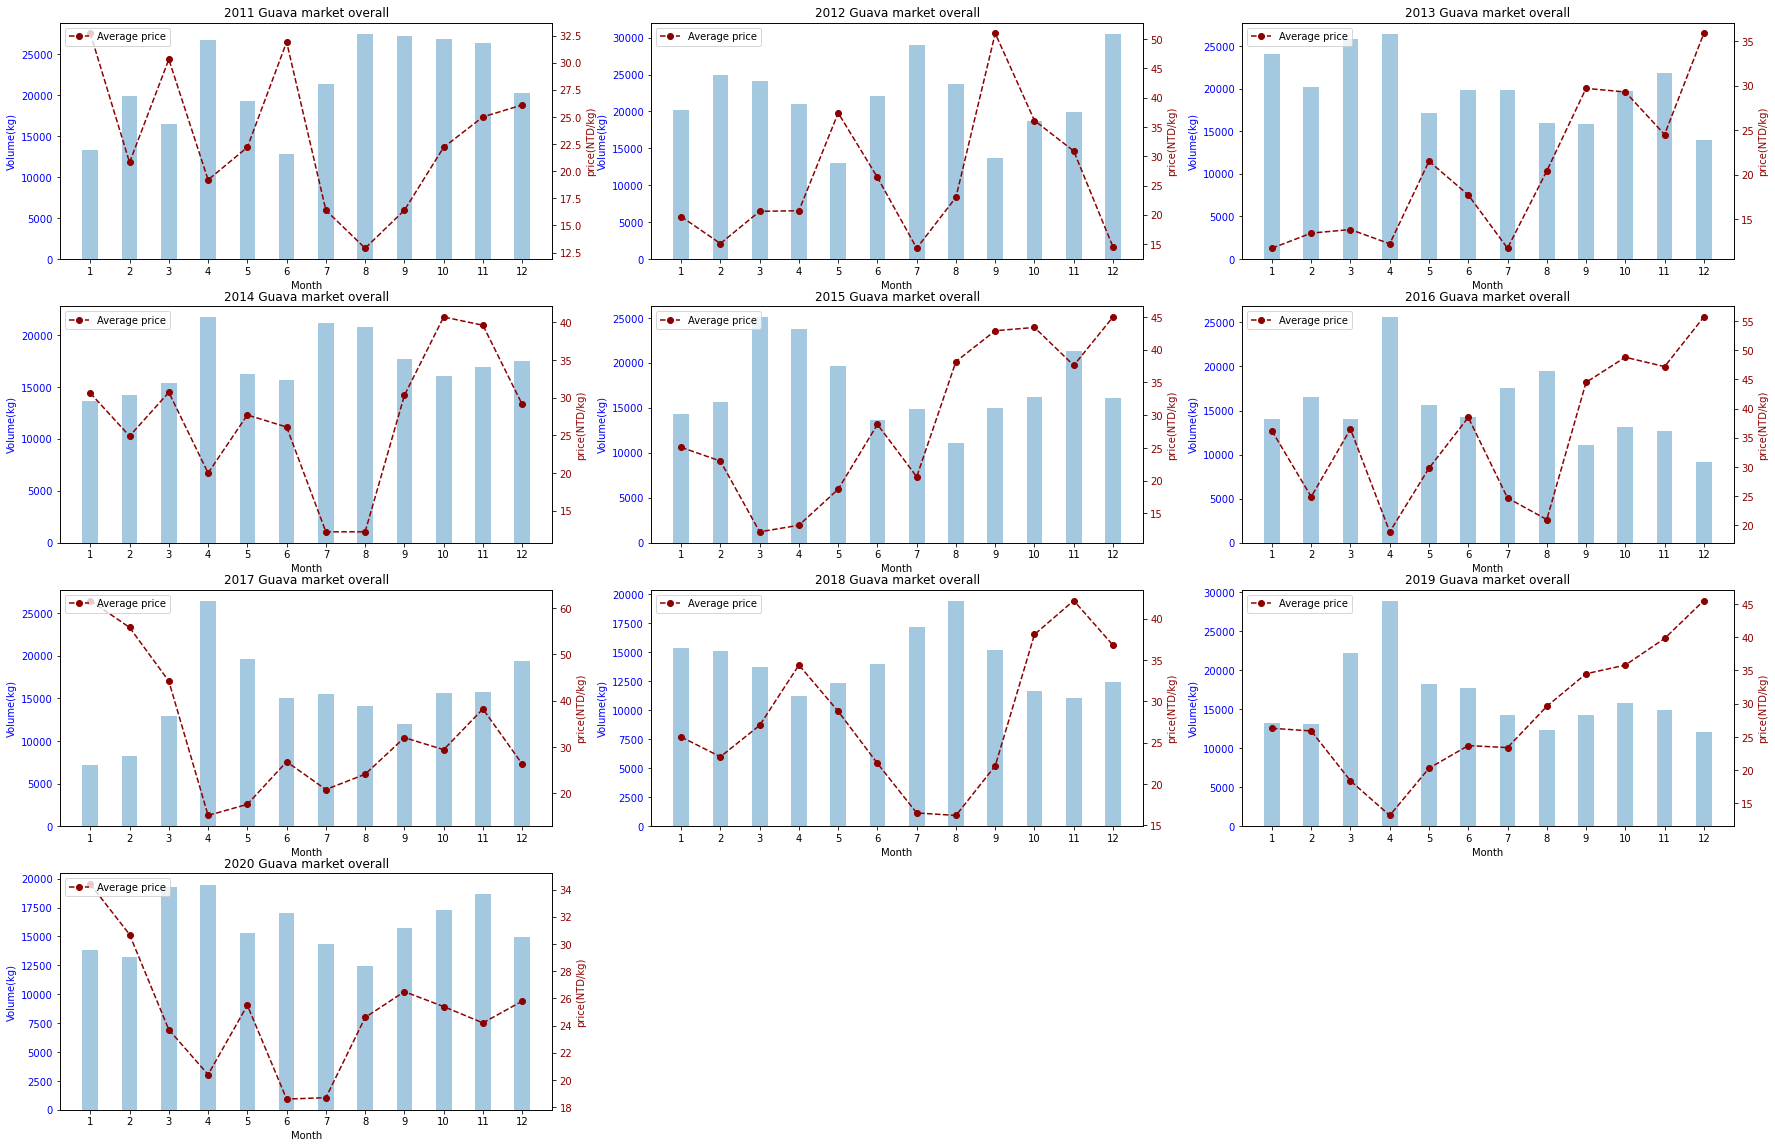

In [19]:
x = np.arange(1, 13)
num = 1

fig_test = plt.figure(figsize=(30,20))
    
for year in range(2011, 2021):
    
    y = output.loc[output["Year"] == year]
    ax1 = fig_test.add_subplot(4,3,num)
    
    width = 0.2
    ax1.set_xticks(x)
    ax1.bar(x, y["交易量(公斤)"], width=0.4, alpha=0.4)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Volume(kg)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(x, y["平均價(元/公斤)"], "--", marker="o", color="darkred",label="Average price")
    ax2.set_ylabel("price(NTD/kg)", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

    #fig.tight_layout()
    plt.title(f"{year} Guava market overall")
    plt.legend(loc="upper left")
    
    num+=1
    
plt.savefig("全國芭樂各年度價格＆交易量.jpg")